<a href="https://colab.research.google.com/github/jov580/astro-vezbe/blob/main/Nebeska_sfera_i_koordinatni_sistemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

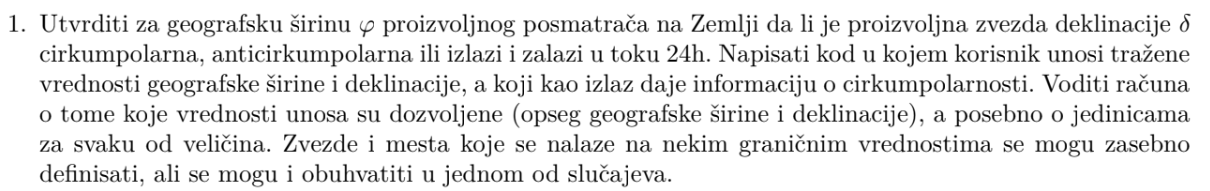

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ap

In [2]:
print("Unesite geografsku sirinu: ")
sirina = float(input())
while sirina < -90 or sirina > 90:
  print("Nedozvoljena sirina")
  sirina = float(input())

print("Unesite deklinaciju: ")
deklinacija = float(input())
while deklinacija < -90 or deklinacija > 90:
  print("Nedozvoljena deklinacija")
  deklinacija = float(input())
if sirina > 0:
  if 90 - sirina <= deklinacija and deklinacija <= 90:
    print("Zvezda je cirkumpolarna!!!")
  elif -90 <= deklinacija and deklinacija <= -90 + sirina:
    print("Zvezda je anticirkumpolarnaaaaa")
  else:
    print("Zvezda izlazeca zalazeca...")
elif sirina < 0:
  if 90+sirina <= deklinacija and deklinacija <= 90:
    print("Zvezda je anticirkumpolarnaaaaa")
  elif -90 <= deklinacija and deklinacija <= -90-sirina:
    print("Zvezda je cirkumpolarna!!!")
  else:
    print("Zvezda izlazeca zalazeca...")
else:
    print("Nalazimo se na ekvatoru! Sve zvezde izlaze iiii zalazeee")


Unesite geografsku sirinu: 
56
Unesite deklinaciju: 
-43
Zvezda je anticirkumpolarnaaaaa


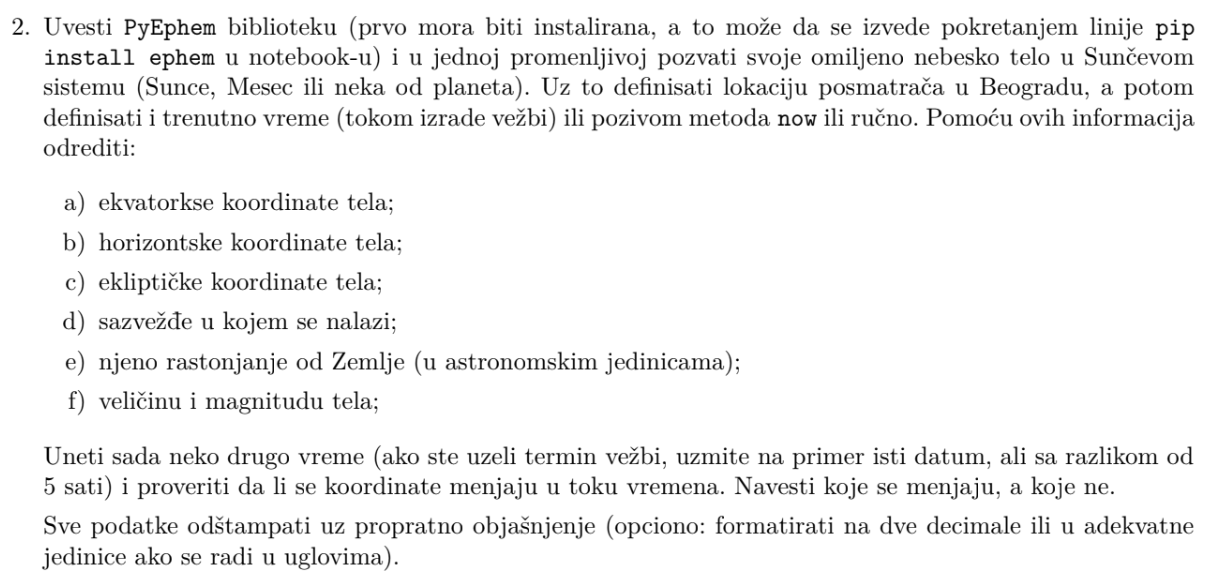

In [3]:
pip install ephem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:00


In [7]:
from ephem import *
from pandas import *

In [5]:
posmatrac = Observer()
posmatrac.lat = '44.7866'
posmatrac.lon = '20.4489'

posmatrac.date = '2024/05/05 12:00:00'

merkur = Mercury()

merkur.compute(posmatrac)

ekvatorske = (merkur.ra, merkur.dec)

horizonteske = (merkur.az, merkur.alt)

eklipticke = (Ecliptic(merkur).lon, Ecliptic(merkur).lat)


sazvezdje = constellation(merkur)

rastojanje_od_zemlje = merkur.earth_distance

velicina = merkur.size
magnituda = merkur.mag

print("Ekvatorijalne koordinate tela:", ekvatorske)
print("Horizontske koordinate tela:", horizonteske)
print("Eklptičke koordinate tela:", eklipticke)
print("Sazvežđe u kojem se nalazi:", sazvezdje)
print("Rastojanje tela od Zemlje:", rastojanje_od_zemlje)
print("Veličina tela (u radijanima):", velicina)
print("Magnituda tela:", magnituda)

Ekvatorijalne koordinate tela: (0.33800250880243743, 0.08852636162414927)
Horizontske koordinate tela: (4.159614086151123, 0.5981296300888062)
Eklptičke koordinate tela: (0.33969543124010304, -0.050291390890411306)
Sazvežđe u kojem se nalazi: ('Psc', 'Pisces')
Rastojanje tela od Zemlje: 0.7609142661094666
Veličina tela (u radijanima): 8.857765197753906
Magnituda tela: 0.77


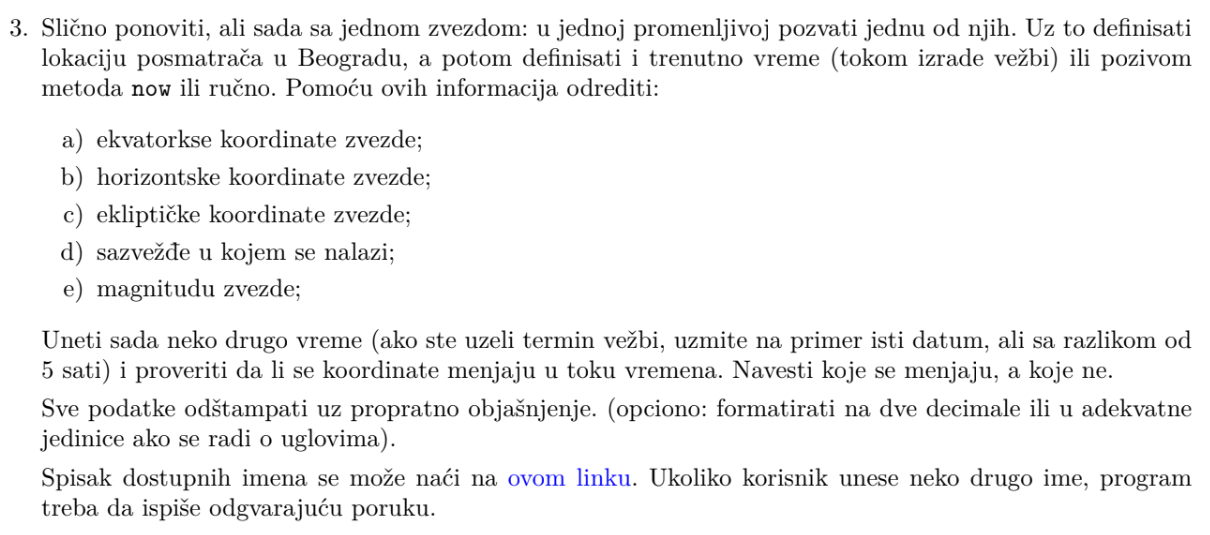

In [9]:
posmatrac = Observer()
posmatrac.lat = '44.7866'
posmatrac.lon = '20.4489'

posmatrac.date = '2024/05/05 12:00:00'

zvezda = readdb("Sirius,f|S|A0,6.75247697|-546.01,-16.71611569|-1223.08,-1.44")

zvezda.compute(posmatrac)

ekvatroske = (zvezda.ra, zvezda.dec)

horizontske = (zvezda.az, zvezda.alt)

eklipticke = (Ecliptic(zvezda).lon, Ecliptic(zvezda).lat)

sazvezdje = "Canis Major"

magnituda = zvezda.mag


print("Ekvatorijalne koordinate zvezde:", ekvatroske)
print("Horizontske koordinate zvezde:", horizontske)
print("Eklptičke koordinate zvezde:", eklipticke)
print("Sazvežđe u kojem se nalazi:", sazvezdje)
print("Magnituda zvezde:", magnituda)


Ekvatorijalne koordinate zvezde: (1.7723934947919153, -0.2923690761649496)
Horizontske koordinate zvezde: (2.478116512298584, 0.3454756438732147)
Eklptičke koordinate zvezde: (1.8165034562706195, -0.6913920599715053)
Sazvežđe u kojem se nalazi: Canis Major
Magnituda zvezde: -1.44


In [12]:
posmatrac.date += 5 * hour

zvezda.compute(posmatrac)

ekvatroske2 = (zvezda.ra, zvezda.dec)

horizontske2 = (zvezda.az, zvezda.alt)

eklipticke2 = (Ecliptic(zvezda).lon, Ecliptic(zvezda).lat)

magnituda2 = zvezda.mag

print("Koordinate zvezde za novo vreme (+5 sati):")
print("Ekvatorijalne koordinate zvezde:", ekvatroske2)
print("Horizontske koordinate zvezde:", horizontske2)
print("Eklptičke koordinate zvezde:", eklipticke2)
print("Magnituda zvezde:", magnituda2)

Koordinate zvezde za novo vreme (+5 sati):
Ekvatorijalne koordinate zvezde: (1.772392674538507, -0.2923687966027968)
Horizontske koordinate zvezde: (0.2923334538936615, -1.0663264989852905)
Eklptičke koordinate zvezde: (1.8165034517528993, -0.6913920705210124)
Magnituda zvezde: -1.44


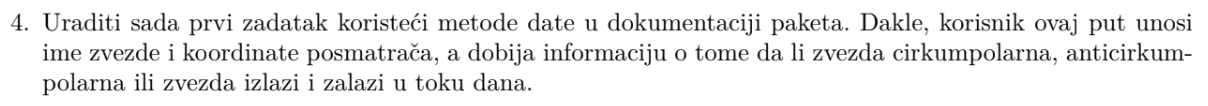

In [13]:
ime_zvezde = input("Unesite ime zvezde: ")
sirina = float(input("Unesite geografsku sirinu posmatrača: "))
duzina = float(input("Unesite geografsku duzinu posmatrača: "))

posmatrac = Observer()
posmatrac.lat = sirina
posmatrac.lon = duzina

zvezda = star(ime_zvezde)

posmatrac.date = now()

zvezda.compute(posmatrac)

if zvezda.circumpolar:
        print(f"{ime_zvezde} je cirkumpolarna zvezda.")
elif zvezda.anticircumpolar:
        print(f"{ime_zvezde} je anticirkumpolarna zvezda.")
else:
        print(f"{ime_zvezde} izlazi i zalazi u toku dana.")

Unesite ime zvezde: Polaris
Unesite geografsku sirinu posmatrača: 44
Unesite geografsku duzinu posmatrača: 33
Polaris je cirkumpolarna zvezda.


<ipython-input-13-86a6a7c6919a>:15: DeprecationWarning: the ephem.Body attributes 'rise_time', 'rise_az', 'transit_time', 'transit_alt', 'set_time', 'set_az', 'circumpolar', and 'never_up' are deprecated; please convert your program to use the ephem.Observer functions next_rising(), previous_rising(), next_transit(), and so forth

  if zvezda.circumpolar:
